<a href="https://colab.research.google.com/github/e-done/math-1009/blob/main/rigidMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generate Example

id =  659


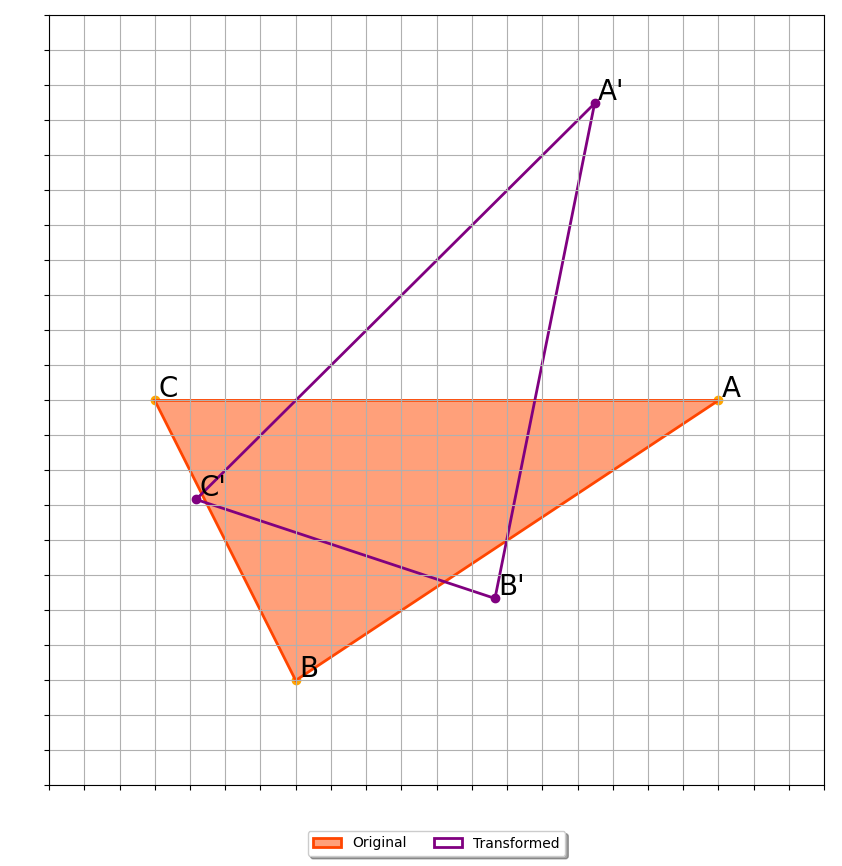

In [2]:
################################################################################
id = None # random seed
transformation = 'random'
               # 'reflect', 'translate', 'glide_reflect', 'rotate', 'random'
problem = 'random'
        # 'forward', 'backward', 'solution', 'random'
grid = 'random'
     # 'square', 'triangle', 'random'
################################################################################

import numpy as np
from matplotlib import pyplot as plt
from random import randint
from random import choice
from random import seed
from string import ascii_uppercase

if id == None :
  id = randint(1.,1000.)
  print('id = ',id)

if transformation == 'random' :
  transformation = choice(['reflect', 'translate', 'glide_reflect', 'rotate'])

if problem == 'random' :
  problem = choice(['forward', 'backward'])

if grid == 'random' :
  grid = choice(['square', 'triangle'])

def translate(x,y) :
  return x+v[0], y+v[1]

def reflect(x,y) :
  xhat = np.array([x,y]).T
  matrix = np.array([[1-m**2, 2*m],[2*m, m**2 -1]])
  matrix = matrix * (1/(1+m**2))
  R = matrix.dot(xhat)
  return R[0],R[1]

def glide_reflect(x,y) :
  x1, y1 = translate(x,y)
  x2, y2 = reflect(x1,y1)
  return x2, y2

def rotate(x,y) :
  qx = np.cos(angle) * x - np.sin(angle) * y
  qy = np.sin(angle) * x + np.cos(angle) * y
  return qx, qy

def collinear(P) :
  x1, y1 = P[1][0] - P[0][0], P[1][1] - P[0][1]
  x2, y2 = P[2][0] - P[0][0], P[2][1] - P[0][1]
  return abs(x1 * y2 - x2 * y1) < 1e-12

seed(id)
fig, ax = plt.subplots(figsize=(10,10))
if grid == 'square' :
  plt.grid(True)
else :
  plt.grid(False)

# angle of rotation
if grid == 'square' :
  angle = choice([90., 180., -90.])
else :
  angle = choice([60., 120., 180., -60., -120.])
if angle > 0.:
  tit = f'{int(angle)} degrees counter-clockwise'
else :
  tit = f'{-int(angle)} degrees clockwise'
angle *= np.pi/180.

# slope of reflection line
if grid == 'square' :
  rise = choice(list(range(-5,6)))
  run = 0
  while run == 0 :
    # avoid vertical line
    run = choice(list(range(-5,6)))
  m = rise/run
else :
  m = np.tan(angle)
  L = choice([1., 2., 3.])
  rise = m*L
  run = L

# vector of translation
v = np.array([run, rise])

# shape points
N = 3
X = [0. for i in range(N)]
Y = [0. for i in range(N)]
while collinear(list(zip(X,Y))) :
  X = []
  Y = []
  for i in range(N) :
    if grid == 'square' :
      # offset from origin a multiple of the slope
      # (so shape points are on grid points)
      offset = randint(-3,3)
      xl = run*offset
      yl = rise*offset
      # offset from line point a multiple of the orthogonal slope
      # (so shape and transform points are on grid points)
      offset = randint(-3,3)
      while offset == 0 :
        offset = randint(-3,3)
      X.append(xl+offset*rise)
      Y.append(yl-offset*run)
    else : # triangle grid
      ix = randint(-10,10)
      iy = randint(-10,10)
      while ix==0 and iy==0 :
        ix = randint(-10,10)
        iy = randint(-10,10)
      if np.mod(ix,2) :
        # ix is odd, want iy to be odd so land on a vertex in the triangular grid
        if not np.mod(iy,2) :
          # iy is even, make it odd
          iy += choice([-1,1])
      else :
        # ix is even, want iy to be even so land on a vertex in the triangular grid
        if np.mod(iy,2) :
          # iy is odd, make it even
          iy += choice([-1,1])
      # convert to x,y coordinates
      X.append(ix*0.5)
      Y.append(iy*np.sqrt(3.)/2.)

    # plot shape points
    plt.scatter(X[-1],Y[-1],c='orange')
    ax.annotate(f'{ascii_uppercase[i]}', (X[-1], Y[-1]), size=20, xytext=(X[-1]+0.1, Y[-1]+0.1))

# image points
Xp = []
Yp = []
r = [np.Inf, -np.Inf, np.Inf, -np.Inf]
for i in range(N):

  x = X[i]
  y = Y[i]
  xp,yp = eval(f'{transformation}(x,y)')
  Xp.append(xp)
  Yp.append(yp)
  if problem == 'solution' or problem == 'backward' :
    # plot image points
    plt.scatter(xp,yp,c='purple')
    ax.annotate(f"{ascii_uppercase[i]}'", (xp, yp), size=20, xytext=(xp+0.1, yp+0.1))

  if np.min([x,xp]) < r[0] :
    r[0] = int(np.min([x,xp]))
  if np.max([x,xp]) > r[1] :
    r[1] = int(np.max([x,xp]))
  if np.min([y,yp]) < r[2] :
    r[2] = int(np.min([y,yp]))
  if np.max([y,yp]) > r[3] :
    r[3] = int(np.max([y,yp]))

# plot original shape
plt.fill(X,Y,facecolor='lightsalmon', edgecolor='orangered', linewidth=2, label='Original')

# plot transformed image
if problem == 'solution' or problem == 'backward' :
  plt.fill(Xp,Yp,facecolor='none', edgecolor='purple', linewidth=2, label='Transformed')

# plot origin of rotation
if transformation == 'rotate' and (problem == 'solution' or problem == 'forward') :
  plt.scatter(0.,0.,c='black')
  ax.annotate('O', (0.,0.), size=25, xytext=(0.1, 0.1))

# plot line of reflection
if (transformation == 'reflect' or transformation == 'glide_reflect') and (problem == 'solution' or problem == 'forward') :
  x_range = ax.get_xlim()
  X_LINE = [x for x in np.arange(5*x_range[0],5*x_range[1], 0.1)]
  def f2(x):
    return m*x
  lvec = np.vectorize(f2)
  Y_LINE = [y for y in lvec(X_LINE)]
  if problem == 'solution' or problem == 'forward' :
    plt.plot(X_LINE, Y_LINE, color='g', linewidth=2, linestyle='dashed')

# plot vector of translation
if (transformation == 'translate' or transformation == 'glide_reflect') and (problem == 'solution' or problem == 'forward') :
  if grid == 'square' :
    plt.quiver(2., 2., v[0], v[1], color=['g'], angles='xy', scale_units='xy', scale=1)
  else : # triangle
    plt.quiver(3., np.sqrt(3.), v[0], v[1], color=['g'], angles='xy', scale_units='xy', scale=1)

# plot legend
if problem == 'solution' or problem == 'backward' :
  ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2)

# write title
if (problem == 'solution' or problem == 'forward') and (transformation == 'rotate') :
  plt.title(tit)

# format axis
xmin = r[0]-3
xmax = r[1]+3
ymin = r[2]-3
ymax = r[3]+3
if transformation == 'translate' or transformation == 'glide_reflect' :
  # also account for arrow size
  xmin = np.min([xmin, v[0]])
  xmax = np.max([xmax, v[0]])
  ymin = np.min([ymin, v[1]])
  ymax = np.max([ymax, v[1]])
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
if grid == 'square' :
  ax.set_xticks(list(range(xmin,xmax+1)))
  ax.set_yticks(list(range(ymin,ymax+1)))
else : # triangle
  x = np.linspace(xmin,xmax)
  # horizontal lines
  dy = np.sqrt(3.)/2.
  m = 0.
  for b in np.linspace(-25.*dy,25.*dy,num=51,endpoint=True) :
    y = m*x + b
    plt.plot(x,y,color='gray',linewidth=0.5)
  # diagonal lines (+)
  dy = np.sqrt(3.)
  m = np.sqrt(3.)
  for b in np.linspace(-25.*dy,25.*dy,num=51,endpoint=True) :
    y = m*x + b
    plt.plot(x,y,color='gray',linewidth=0.5)
  # diagonal lines (-)
  dy = np.sqrt(3.)
  m = -np.sqrt(3.)
  for b in np.linspace(-25.*dy,25.*dy,num=51,endpoint=True) :
    y = m*x + b
    plt.plot(x,y,color='gray',linewidth=0.5)
plt.xticks(color='w')
plt.yticks(color='w')
plt.axis([xmin, xmax, ymin, ymax])
plt.gcf().set_size_inches(10,10*( ymax-ymin )/( xmax-xmin ))

# save png
#plt.savefig(f'{transformation}_{problem}_{grid}_{id}.png')
plt.show()
